<a href="https://colab.research.google.com/github/bs3537/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Bhav_Copy_of_DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

Hint: If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function.

In [0]:
import pandas as pd
import numpy as np


In [0]:
df = pd.read_csv('crx.data')

In [0]:
df.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [0]:
df.shape

(689, 16)

In [0]:
# insert column headers
# column headers from crx.names file

columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']

In [0]:
data = pd.read_csv('crx.data', names=columns)

In [0]:
data.head()
# The data row in column header has now been moved to first row and column headers are inserted.

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [0]:
data.shape

(690, 16)

In [0]:
# The data index file says that there are also missing values, so let us try to clean them first.
# The missing values here are in the form of '?'
missing_values = ['?']

In [0]:
# Replacing the missing values with N/A values

data = pd.read_csv('crx.data', names=columns, na_values=missing_values)

In [0]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [0]:
data.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [0]:
data.shape

(690, 16)

In [0]:
# The number of missing values matches that given in the index file


In [0]:
data.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

In [0]:
data['A1'].unique()

array(['b', 'a', nan], dtype=object)

In [0]:
# The columns have values as objects which need to be converted to numeric values

a_or_b = {'a': 0,'b': 1, 'nan': 0}

In [0]:
# column A1
data2 = data.replace(a_or_b)
data2.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,0,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,0,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,1,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,1,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [0]:
data2['A4'].unique()

array(['u', 'y', nan, 'l'], dtype=object)

In [0]:
# column A4
a4 = {'u': 1,'y': 0, 'nan': 0}

In [0]:
# column A4
data3 = data2.replace(a4)
data3.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,1,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,0,58.67,4.460,1,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,0,24.50,0.500,1,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,1,27.83,1.540,1,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,1,20.17,5.625,1,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [0]:
# column A5
data3['A5'].unique()

array(['g', 'p', nan, 'gg'], dtype=object)

In [0]:
a5 = {'p': 1,'g': 2, 'gg': 3, 'nan': 0}

In [0]:
data4 = data3.replace(a5)
data4.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,1,2,w,v,1.25,t,t,1,f,2,202.0,0,+
1,0,58.67,4.460,1,2,q,h,3.04,t,t,6,f,2,43.0,560,+
2,0,24.50,0.500,1,2,q,h,1.50,t,f,0,f,2,280.0,824,+
3,1,27.83,1.540,1,2,w,v,3.75,t,t,5,t,2,100.0,3,+
4,1,20.17,5.625,1,2,w,v,1.71,t,f,0,f,s,120.0,0,+


In [0]:
# column A6
data4['A6'].unique()

array(['w', 'q', 'm', 'r', 'cc', 'k', 'c', 'd', 'x', 'i', 'e', 'aa', 'ff',
       'j', nan], dtype=object)

In [0]:
#1, 2,3,4,5, 6,7,8,9,10,11,12,13,14 CATEGORICAL (formerly: ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x)

a6 = {'ff': 1, 'd': 2, 'i': 3, 'k': 4, 'j': 5, 'aa': 6, 'm': 7, 'c': 8, 'w': 9, 'e': 10, 'q': 11, 'r': 12, 'cc': 13, 'x': 14, 'nan': 0}

In [0]:
# column A5
data5 = data4.replace(a6)
data5.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,1,2,9,v,1.25,t,t,1,f,2,202.0,0,+
1,0,58.67,4.460,1,2,11,h,3.04,t,t,6,f,2,43.0,560,+
2,0,24.50,0.500,1,2,11,h,1.50,t,f,0,f,2,280.0,824,+
3,1,27.83,1.540,1,2,9,v,3.75,t,t,5,t,2,100.0,3,+
4,1,20.17,5.625,1,2,9,v,1.71,t,f,0,f,s,120.0,0,+


In [0]:
# column A7
data5['A7'].unique()


array(['v', 'h', 'bb', 1, 5, 'z', nan, 'o', 'dd', 'n'], dtype=object)

In [0]:
a7 = {'h': 2,'n': 3, 'o': 4, 'v': 6, 'z': 7, 'bb': 8, 'dd': 9}

In [0]:

data6 = data5.replace(a7)
data6.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1.0,30.83,0.000,1,2.0,9.0,6.0,1.25,t,t,1,f,2,202.0,0,+
1,0.0,58.67,4.460,1,2.0,11.0,2.0,3.04,t,t,6,f,2,43.0,560,+
2,0.0,24.50,0.500,1,2.0,11.0,2.0,1.50,t,f,0,f,2,280.0,824,+
3,1.0,27.83,1.540,1,2.0,9.0,6.0,3.75,t,t,5,t,2,100.0,3,+
4,1.0,20.17,5.625,1,2.0,9.0,6.0,1.71,t,f,0,f,s,120.0,0,+


In [0]:
# column A9
data6['A9'].unique()

array(['t', 'f'], dtype=object)

In [0]:
a9 = {'t': 1,'f': 0}

In [0]:

data7 = data6.replace(a9)
data7.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1.0,30.83,0.000,1,2.0,9.0,6.0,1.25,1,1,1,0,2,202.0,0,+
1,0.0,58.67,4.460,1,2.0,11.0,2.0,3.04,1,1,6,0,2,43.0,560,+
2,0.0,24.50,0.500,1,2.0,11.0,2.0,1.50,1,0,0,0,2,280.0,824,+
3,1.0,27.83,1.540,1,2.0,9.0,6.0,3.75,1,1,5,1,2,100.0,3,+
4,1.0,20.17,5.625,1,2.0,9.0,6.0,1.71,1,0,0,0,s,120.0,0,+


In [0]:
# column A13
data7['A13'].unique()

array([2, 's', 1], dtype=object)

In [0]:
a13 = {'s': 3}

In [0]:

data8 = data7.replace(a13)
data8.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1.0,30.83,0.000,1,2.0,9.0,6.0,1.25,1,1,1,0,2,202.0,0,+
1,0.0,58.67,4.460,1,2.0,11.0,2.0,3.04,1,1,6,0,2,43.0,560,+
2,0.0,24.50,0.500,1,2.0,11.0,2.0,1.50,1,0,0,0,2,280.0,824,+
3,1.0,27.83,1.540,1,2.0,9.0,6.0,3.75,1,1,5,1,2,100.0,3,+
4,1.0,20.17,5.625,1,2.0,9.0,6.0,1.71,1,0,0,0,3,120.0,0,+


In [0]:
# column A16
data8['A16'].unique()

array(['+', '-'], dtype=object)

In [0]:
a16 = {'+': 1, '-': 2}

In [0]:
data9 = data8.replace(a16)
data9.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1.0,30.83,0.000,1,2.0,9.0,6.0,1.25,1,1,1,0,2,202.0,0,1
1,0.0,58.67,4.460,1,2.0,11.0,2.0,3.04,1,1,6,0,2,43.0,560,1
2,0.0,24.50,0.500,1,2.0,11.0,2.0,1.50,1,0,0,0,2,280.0,824,1
3,1.0,27.83,1.540,1,2.0,9.0,6.0,3.75,1,1,5,1,2,100.0,3,1
4,1.0,20.17,5.625,1,2.0,9.0,6.0,1.71,1,0,0,0,3,120.0,0,1


In [0]:
data9.dtypes

A1     float64
A2     float64
A3     float64
A4      object
A5     float64
A6     float64
A7     float64
A8     float64
A9       int64
A10      int64
A11      int64
A12      int64
A13      int64
A14    float64
A15      int64
A16      int64
dtype: object

In [0]:
data9["A4"].unique()

array([1, 0, nan, 'l'], dtype=object)

In [0]:
a17 = {'1': 1, '0': 2}

In [0]:
data10 = data9.replace(a17)
data10.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1.0,30.83,0.000,1,2.0,9.0,6.0,1.25,1,1,1,0,2,202.0,0,1
1,0.0,58.67,4.460,1,2.0,11.0,2.0,3.04,1,1,6,0,2,43.0,560,1
2,0.0,24.50,0.500,1,2.0,11.0,2.0,1.50,1,0,0,0,2,280.0,824,1
3,1.0,27.83,1.540,1,2.0,9.0,6.0,3.75,1,1,5,1,2,100.0,3,1
4,1.0,20.17,5.625,1,2.0,9.0,6.0,1.71,1,0,0,0,3,120.0,0,1


In [0]:
data10.dtypes

A1     float64
A2     float64
A3     float64
A4      object
A5     float64
A6     float64
A7     float64
A8     float64
A9       int64
A10      int64
A11      int64
A12      int64
A13      int64
A14    float64
A15      int64
A16      int64
dtype: object

In [0]:
data10['A4'].unique()

array([1, 0, nan, 'l'], dtype=object)

In [0]:
# column A4 is not converted to integars yet, despite successful code in other columns.
# let us drop this column for now and explore relationships in other numeric columns


In [0]:
data11= data10.drop(columns=["A4"], inplace=False, axis=0, index=None, errors='ignore')

In [0]:
data11.head()

,A1,A2,A3,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1.0,30.83,0.000,2.0,9.0,6.0,1.25,1,1,1,0,2,202.0,0,1
1,0.0,58.67,4.460,2.0,11.0,2.0,3.04,1,1,6,0,2,43.0,560,1
2,0.0,24.50,0.500,2.0,11.0,2.0,1.50,1,0,0,0,2,280.0,824,1
3,1.0,27.83,1.540,2.0,9.0,6.0,3.75,1,1,5,1,2,100.0,3,1
4,1.0,20.17,5.625,2.0,9.0,6.0,1.71,1,0,0,0,3,120.0,0,1


In [0]:
data11.dtypes

A1     float64
A2     float64
A3     float64
A5     float64
A6     float64
A7     float64
A8     float64
A9       int64
A10      int64
A11      int64
A12      int64
A13      int64
A14    float64
A15      int64
A16      int64
dtype: object

In [0]:
# finding null values
data11.isnull().sum()

A1     12
A2     12
A3      0
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [0]:
data12 = data11.dropna()

In [0]:
data12.isnull().sum()

A1     0
A2     0
A3     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [0]:
# The null values have now been dropped as the dataset is coded in numeric form and clean. Now we can use it for statistical analysis for variables that predict column A16

In [0]:
# For sake of privacy here, column names except A16 are hidden for secrecy, so we do not have to name them, let us name A16
data13 = data12.rename(columns={'A16': 'credit worthy?'})


In [0]:
data13.head()

,A1,A2,A3,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,credit worthy?
0,1.0,30.83,0.000,2.0,9.0,6.0,1.25,1,1,1,0,2,202.0,0,1
1,0.0,58.67,4.460,2.0,11.0,2.0,3.04,1,1,6,0,2,43.0,560,1
2,0.0,24.50,0.500,2.0,11.0,2.0,1.50,1,0,0,0,2,280.0,824,1
3,1.0,27.83,1.540,2.0,9.0,6.0,3.75,1,1,5,1,2,100.0,3,1
4,1.0,20.17,5.625,2.0,9.0,6.0,1.71,1,0,0,0,3,120.0,0,1


In [0]:
data13.shape

(653, 15)

In [0]:
# Let us look at the relationships between other variables

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


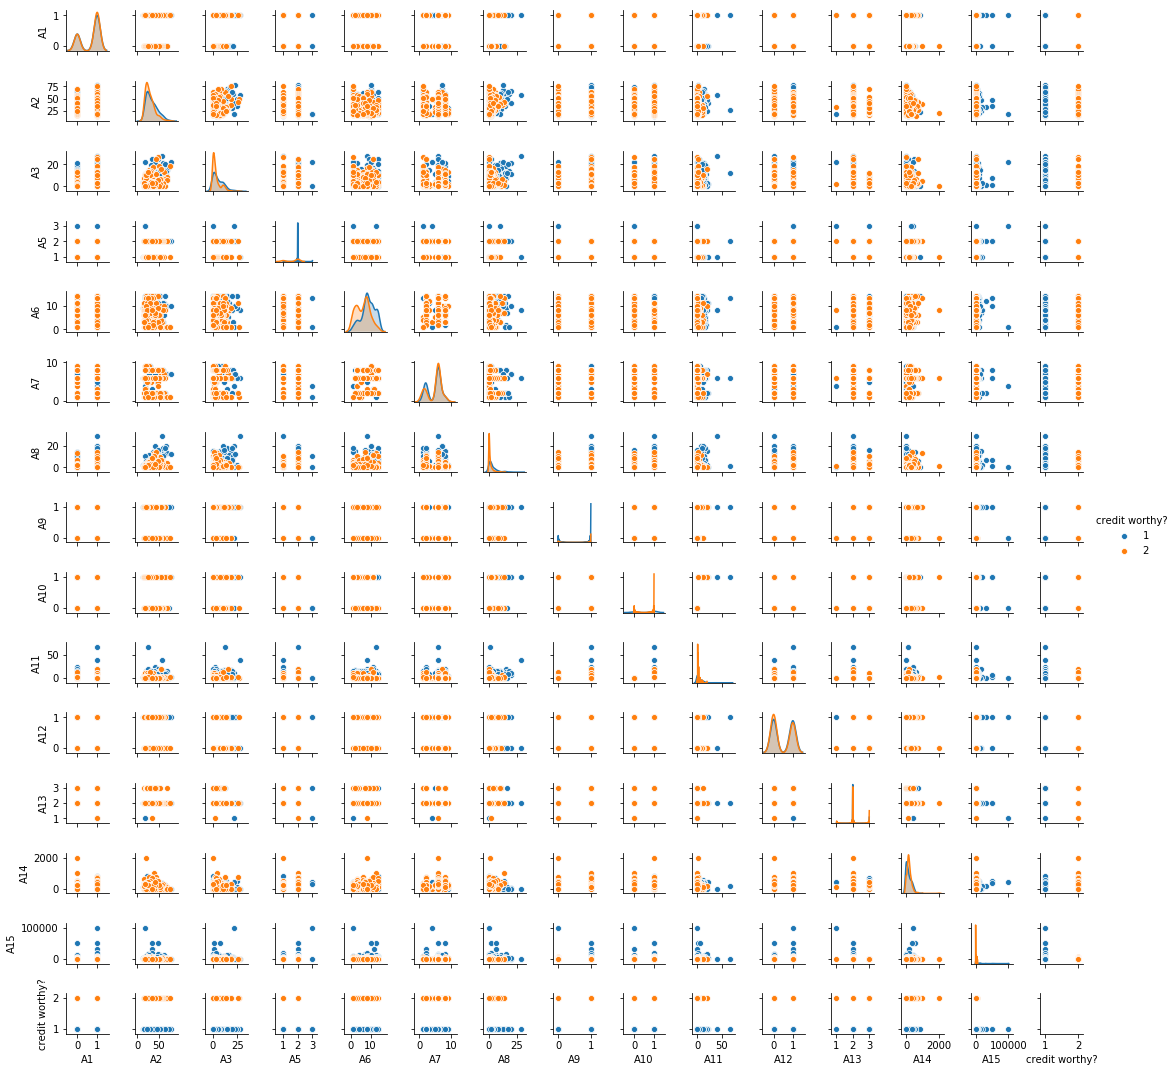

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data13, hue='credit worthy?', aspect=1, height=1)
plt.show();

In [0]:
# t test number 1

#null hypothesis is that there is no difference in means between the values of columns A2 and A14

In [0]:
# t test between A2 and A14 which are integar values

# isolating A2 column
data14 = data13['A2']
data14.head()

0    30.83
1    58.67
2    24.50
3    27.83
4    20.17
Name: A2, dtype: float64

In [0]:
# isolating A14 column
data15 = data13['A14']
data15.head()

0    202.0
1     43.0
2    280.0
3    100.0
4    120.0
Name: A14, dtype: float64

In [0]:
from scipy import stats

In [0]:
from scipy.stats import ttest_ind
ttest_ind(data14, data15, equal_var=False)

Ttest_indResult(statistic=-22.546308945595797, pvalue=7.413286946079797e-84)

In [0]:
# From the output above, the t stastic is 22.54 and p value is very low, 
#so taking p<0.01 as significance threshold, we reject the null hypothesis and conclude that there is a significant difference in the means of variables A2 and A14

In [0]:
# t test number 2

#null hypothesis is that there is no difference in means between the values of columns A8 and A14

In [0]:
# isolating A8 column
data18 = data13['A8']
data18.head()

0    1.25
1    3.04
2    1.50
3    3.75
4    1.71
Name: A8, dtype: float64

In [0]:
ttest_ind(data15, data18, equal_var=False)

Ttest_indResult(statistic=27.039304010815336, pvalue=1.3521480183462144e-108)

In [0]:
# The p value is very low and below <0.01, so we reject the null hypothesis.
# Conclusion: there is a significant difference in the means of variables A8 and A14

In [0]:
# Chi Square test between continuous variables

# Chi Square test number 1

# isolating A16 column: credit worthiness
data16 = data13['credit worthy?']
data16.head()

0    1
1    1
2    1
3    1
4    1
Name: credit worthy?, dtype: int64

In [0]:
# isolating A16 column: credit worthiness
data16 = data13['credit worthy?']
data16.head()

In [0]:
# isolating A7 column: this has lot of categorical variables
data17 = data13['A7']
data17.head()

0    6.0
1    2.0
2    2.0
3    6.0
4    6.0
Name: A7, dtype: float64

In [0]:
# Null hypothesis is that there is no relationship between credit worthiness and variable A7

In [0]:
# creating contigency table
contingency_table = pd.crosstab(data16, data17, margins=True)
contingency_table

A7,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,All
credit worthy?,,,,,,,,,,
1,8,87,2,1,3,163,6,24,2,296
2,46,50,2,1,5,218,2,29,4,357
All,54,137,4,2,8,381,8,53,6,653


In [0]:
#Chi-Squared Statistic

observed = pd.crosstab(data16, data17).values
print(observed.shape)
observed

(2, 9)


array([[  8,  87,   2,   1,   3, 163,   6,  24,   2],
       [ 46,  50,   2,   1,   5, 218,   2,  29,   4]])

In [0]:
# Chi Square Test using Scipy.

chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

42.988254470828515 8.829142688919391e-07 8 [[ 24.47779479  62.10107198   1.81316998   0.90658499   3.62633997
  172.70444104   3.62633997  24.0245023    2.71975498]
 [ 29.52220521  74.89892802   2.18683002   1.09341501   4.37366003
  208.29555896   4.37366003  28.9754977    3.28024502]]


In [0]:
# From the above output, chi square statistic is 42.98. p value is very low
# defining p value threshold as <0.01, we reject the null hypothesis.
# Conclusion: Using Chi Square test, there is a significant relationship between credit worthiness and variable A7.

In [0]:
# Chi Square test number 2
# Null hypothesis is that there is no relationship between credit worthiness and variable A6
# columns A6 also has lot of categorical variables.

# isolating A6 column
data19 = data13['A6']
data19.head()



0     9.0
1    11.0
2    11.0
3     9.0
4     9.0
Name: A6, dtype: float64

In [0]:
# creating contigency table
contingency_table2 = pd.crosstab(data16, data19, margins=True)
contingency_table2

A6,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,All
credit worthy?,,,,,,,,,,,,,,,
1,7,7,14,13,3,19,16,60,33,14,49,2,29,30,296
2,43,19,41,35,7,33,22,73,30,10,26,1,11,6,357
All,50,26,55,48,10,52,38,133,63,24,75,3,40,36,653


In [0]:
#Chi-Squared Statistic

observed2 = pd.crosstab(data16, data19).values
print(observed2.shape)
observed2

(2, 14)


array([[ 7,  7, 14, 13,  3, 19, 16, 60, 33, 14, 49,  2, 29, 30],
       [43, 19, 41, 35,  7, 33, 22, 73, 30, 10, 26,  1, 11,  6]])

In [0]:
# Chi Square Test using Scipy.

chi_squared, p_value, dof, expected = stats.chi2_contingency(observed2)
print(chi_squared, p_value, dof, expected)

89.76481160702345 1.550015454949885e-13 13 [[22.66462481 11.7856049  24.93108729 21.75803982  4.53292496 23.5712098
  17.22511485 60.28790199 28.55742726 10.87901991 33.99693721  1.35987749
  18.13169985 16.31852986]
 [27.33537519 14.2143951  30.06891271 26.24196018  5.46707504 28.4287902
  20.77488515 72.71209801 34.44257274 13.12098009 41.00306279  1.64012251
  21.86830015 19.68147014]]


In [0]:
# From the above output, chi square statistic is 89.76. p value is very low
# defining p value threshold as <0.01, we reject the null hypothesis.
# Conclusion: Using Chi Square test, there is a significant relationship between credit worthiness and variable A6.

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

###t test number 1
- null hypothesis is that there is no difference in means between the values of columns A2 and A14.
- From the output above, the t stastic is 22.54 and p value is very low, 
- so taking p<0.01 as significance threshold, we reject the null hypothesis and conclude that there is a significant difference in the means of variables A2 and A14


### t test number 2

- null hypothesis is that there is no difference in means between the values of columns A8 and A14.
- The p value is very low and below <0.01, so we reject the null hypothesis.
- Conclusion: there is a significant difference in the means of variables A8 and A14

###Chi Square test number 1


- Null hypothesis is that there is no relationship between credit worthiness and variable A7
- From the above output, chi square statistic is 42.98. p value is very low.
- defining p value threshold as <0.01, we reject the null hypothesis.
- Conclusion: Using Chi Square test, there is a significant relationship between credit worthiness and  variable A7.

###Chi Square test number 2
- Null hypothesis is that there is no relationship between credit worthiness and variable A6.
- From the above output, chi square statistic is 89.76. p value is very low.
- defining p value threshold as <0.01, we reject the null hypothesis.
- Conclusion: Using Chi Square test, there is a significant relationship between credit worthiness and variable A6.

The most challenging part of this spirit challenge was cleaning the data, converting it into numeric variables which took most of my time. This exercise shows that cleaning the data can take most of time of data scientists which is true in the real world and it is very important to master these basic steps first before applying advanced analysis techniques like fancy machine learning algorithms.